# Importar Bibliotecas

In [1]:
# Mudar diretório para chamar scripts com funções
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

# Importar funções e flags definidas em flags.py e functions.py
from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import HTML
import webbrowser
from collections import defaultdict

# Ligação à base de dados

In [2]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [3]:
cur.execute('''ROLLBACK;''')

# Concursos Públicos

In [4]:
# Filtrar contratos : ID's concursos públicos com CPV's começados por 72
cpub = (cpv('72', 'Concurso público'))

In [5]:
# Dataframe referente ao conjuntos de contratos públicos celebrados no ramo de consultoria IT 
cp = contratos(cpub)

In [6]:
# A tabela é representada de forma correta : o id do anúncio bate certo com o preço base, contratual e restantes colunas que são relevantes
# Contudo, a ordem dos ID's em cpub é diferente da ordem dos ids na coluna ID da dataframe
# A ordem os id's guardados na variável cpub não bate certo
# Na célula a seguir a esta, é preciso redefini-la
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 3:'Prazo', 16:'DataPub', 17:'DataCel', 18:'PrecoContratual', 23:'EntConcorrentes'})
cp.head(13)

,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10001448,4840/2023,20000.00,6,False,6417636,12848310,2023-03-27,61,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,17999.09,1700348541
1,10004158,4270/2023,409500.00,39,False,6402336,12813822,2023-03-20,56,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700350494
2,10005180,6923/2023,102200.00,6,False,6469692,12961360,2023-05-02,84,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,30525.00,1700350121
3,10005452,6114/2023,16000.00,6,False,6451422,12920559,2023-04-18,76,2,...,None,None,False,None,True,None,Código dos Contratos Públicos ( DL 111-B/2017 ),None,None,1700350046
4,10007696,17004/2022,4118400.00,30,False,6216810,12474556,2022-12-22,245,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700349450
5,10007956,5712/2023,77672.00,9,False,6442490,12898547,2023-04-11,71,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700349363
6,10009799,2052/2023,232320.00,30,False,6339919,12689907,2023-02-13,31,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351925
7,10010325,2054/2023,242000.00,30,False,6355994,12720493,2023-02-13,31,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351769
8,10010396,3280/2023,255000.00,30,False,6374201,12760169,2023-03-03,45,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351738
9,10010576,212/2023,211504.32,,False,6441428,12896204,2023-04-10,70,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351669


In [7]:
cpub = tuple(cp.ID)

In [8]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72

# Desta forma, ambos os preços são ordenados por ordem decrescente relativamente ao índice
#pb = preco_base3(cpub)
#pc = preco_contrato3(cpub)

# É preferível obter os preços a partir da dataframe visto que não há enganos assim
pb = np.array(cp.PrecoBase.replace('None', 0).astype(float))
pc = np.array(cp.PrecoContratual.replace('None', 0).astype(float))

pb[0], pc[0], cpub[0]

(20000.0, 17999.09, '10001448')

In [9]:
# Conjunto de flags disparadas para o conjunto de contratos em causa
# Largura de 10% em torno do preço base - 0.1
# Rácio máximo aceitável entre preço base e contratual de 10
f = redflag(pb, pc, 0.1, cpub, 10,cp)
f

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: divide by zero encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: invalid value encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:587: RuntimeWarning: divide by zero encountered in scalar divide
  div[i] = pbase[i]/pcont[i]


(('10004158',),
 ('10005180',),
 ('10005452',),
 ('10010396',),
 ('10016322',),
 ('10017290',),
 ('10019761',),
 ('10020982',),
 ('10038045',),
 ('10038791',),
 ('10041743',),
 ('10042376',),
 ('10044243',),
 ('10044498',),
 ('10052145',),
 ('10054158',),
 ('10055820',),
 ('10056756',),
 ('10057589',),
 ('10063680',),
 ('10063908',),
 ('10064025',),
 ('10066763',),
 ('10069033',),
 ('10071148',),
 ('10074358',),
 ('10075940',),
 ('10076421',),
 ('10079116',),
 ('10080707',),
 ('10081892',),
 ('10082883',),
 ('10083360',),
 ('10084124',),
 ('10084241',),
 ('10084688',),
 ('10088495',),
 ('10089348',),
 ('10091751',),
 ('10093824',),
 ('10094141',),
 ('10094308',),
 ('10095461',),
 ('10096038',),
 ('10096080',),
 ('10096841',),
 ('10097533',),
 ('10098326',),
 ('10098866',),
 ('10099006',),
 ('10099171',),
 ('10102898',),
 ('10103775',),
 ('10104331',),
 ('10108665',),
 ('10108756',),
 ('10109047',),
 ('10111070',),
 ('10112951',),
 ('10113116',),
 ('10113459',),
 ('10116174',),
 ('10116

# Análise do preço base

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

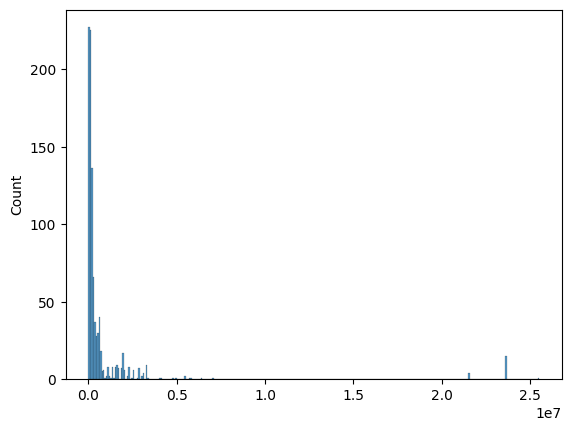

In [33]:
sns.histplot(pb)
plt.plot()

# Análise do preço contratual

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

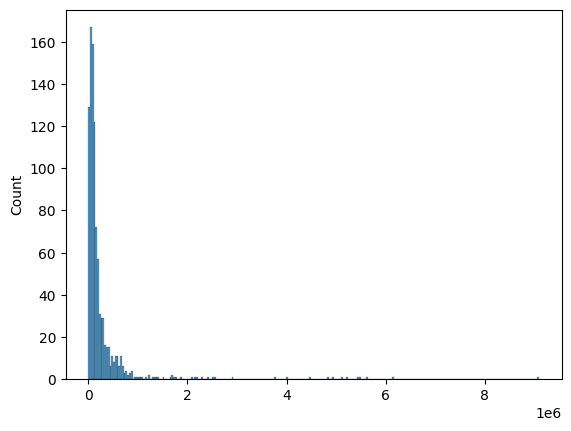

In [11]:
sns.histplot(pc)
plt.plot()

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

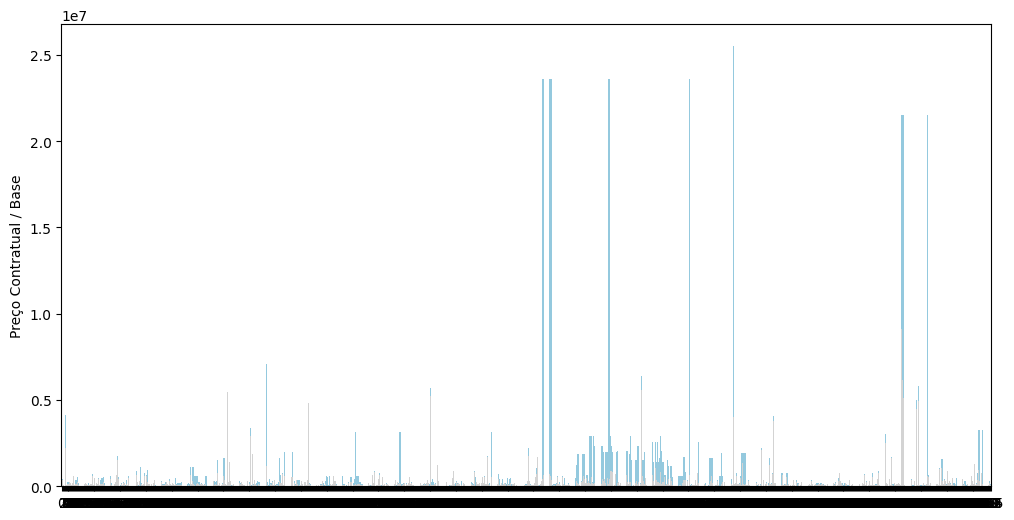

In [12]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.replace('None',0).astype('float')

plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

/tmp/ipykernel_137504/84178919.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.boxplot(pb/pc)
/tmp/ipykernel_137504/84178919.py:1: RuntimeWarning: invalid value encountered in divide
  sns.boxplot(pb/pc)


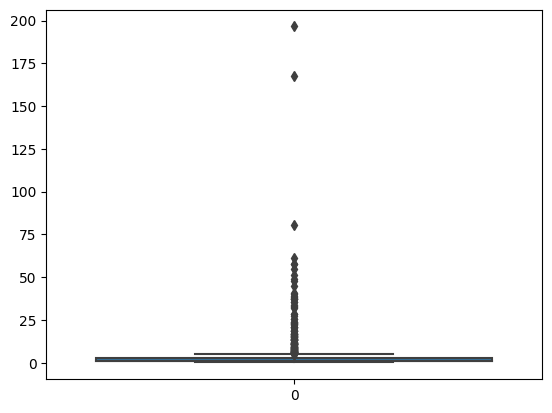

In [13]:
sns.boxplot(pb/pc)
plt.show()

/tmp/ipykernel_137504/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/tmp/ipykernel_137504/3234519312.py:1: RuntimeWarning: invalid value encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


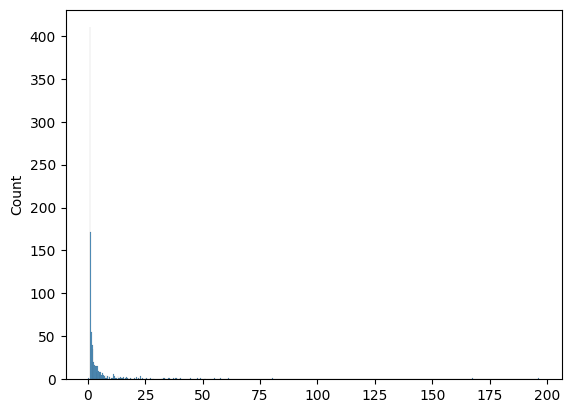

In [14]:
sns.histplot(pb/pc)
plt.show()

# Tratamento dos lotes

In [15]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([409, 756]),)

In [16]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_137504/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))
/tmp/ipykernel_137504/2437271471.py:4: RuntimeWarning: invalid value encountered in divide
  (np.round(pb/pc, 4))


array([  1.111,   1.107,   1.   ,   1.   ,   1.875,   1.349,   1.669,
         2.137,   1.   ,   1.228,   1.   ,   1.006,   1.   ,   1.015,
         2.644,   2.993,   2.215,   2.426,   2.664,   4.763,   3.286,
         7.   ,   1.022,   1.302,   1.008,   1.189,   1.   ,   1.001,
         2.122,   1.   ,   1.   ,   1.064,   1.108,   2.   ,   1.049,
         1.019,   1.004,   1.285,   1.174,   1.188,   2.808,   4.707,
         4.181,   2.162,   2.637,   3.026,   1.307,   1.223,   1.4  ,
         1.229,   1.681,   1.4  ,   2.098,   1.25 ,   1.002,   1.   ,
         1.125,   1.   ,   1.152,   1.378,   1.006,   1.363,   1.491,
         2.015,   1.146,   1.061,   1.391,   2.679,   1.022,   1.254,
         1.053,   1.32 ,   1.003,   1.13 ,   3.768,   1.004,   2.348,
        11.602,   1.286,   1.04 ,   1.27 ,   1.035,  28.188,   1.444,
         1.   ,   1.001,   1.323,   1.006,   1.085,   4.397,   1.   ,
         1.046,   1.465,   1.   ,   7.157,   1.   ,   1.   ,   2.041,
         1.009,   1.

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc e verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocorrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [17]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 30)[0])

(array([ 21,  77,  82,  94, 124, 126, 127, 137, 138, 139, 140, 150, 203,
       213, 216, 225, 226, 246, 261, 263, 275, 276, 278, 292, 305, 306,
       307, 315, 321, 351, 352, 385, 397, 403, 409, 420, 430, 446, 455,
       458, 462, 465, 499, 500, 504, 506, 507, 508, 509, 510, 513, 522,
       532, 533, 534, 536, 537, 541, 548, 549, 550, 552, 553, 554, 556,
       557, 558, 561, 562, 563, 565, 566, 568, 569, 576, 577, 581, 585,
       588, 590, 591, 592, 596, 597, 598, 599, 604, 605, 612, 613, 619,
       620, 621, 623, 624, 625, 627, 629, 634, 636, 637, 639, 641, 642,
       643, 644, 652, 661, 662, 663, 664, 673, 674, 676, 683, 684, 685,
       698, 706, 708, 709, 710, 721, 748, 754, 813, 816, 817, 864, 877,
       878, 879, 884, 899, 929, 939, 953, 956, 957, 958, 959, 960, 961,
       962]),) 

 [  7.     11.602  28.188   7.157   5.699   7.143   5.492   8.593   7.996
  13.382   5.375  16.608   8.62    6.05   11.177   7.779   5.73    9.293
  40.503   5.055  16.608  28.361  37.36   1

/tmp/ipykernel_137504/2939907773.py:2: RuntimeWarning: divide by zero encountered in divide
  rat = pb/pc
/tmp/ipykernel_137504/2939907773.py:2: RuntimeWarning: invalid value encountered in divide
  rat = pb/pc


**2.**

In [18]:
i = 131
pb[i],pc[i], pb[i]/pc[i]

(136382.4, 36571.92, 3.729156139464376)

**3.**

In [19]:
j = (cpub[i])[0]

Cc = contrato(j)
Cc

""


**4**

In [20]:
n_anuncio = Cc.iloc[:,1][0]
n_anuncio

IndexError: single positional indexer is out-of-bounds

**5.**

In [ ]:
np.where(cp.NrAnuncio == n_anuncio) 

In [ ]:
contrato(cpub[131])

In [ ]:
contrato(cpub[156])

# Demonstração

In [74]:
# Datas de Publicação mais frequentes
print( cp.DataPub.apply(pd.to_datetime).dt.date.value_counts())

DataPub
2022-12-16    35
2023-09-07    15
2023-07-03    12
2023-04-05    12
2023-06-28    12
              ..
2023-03-28     1
2023-02-06     1
2022-12-28     1
2023-04-03     1
2023-05-22     1
Name: count, Length: 253, dtype: int64


In [75]:
# Filtrar contratos publicados no dia 2023-09-07
demo = cp.loc[cp['DataPub'] == '2023-09-07'].reset_index()
h(demo)

index,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,20,21,22,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
300,10228484,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",2023-09-07,2023-08-25,232500.00,1096,"Imprensa Nacional - Casa da Moeda, S. A. (500792887)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","HCCM CONSULTING, S.A. (503470120)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=26510)","Brighten SA (504106686)|||AMT Consulting (507750934)|||Amazon Informática, Lda (516411810)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344042,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjI0NDMx,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2053876&ext=.pdf,false,72262000-9,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software,Principal,232500.0,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1701118526
301,10228504,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",2023-09-07,2023-08-25,232500.00,1096,"Imprensa Nacional - Casa da Moeda, S. A. (500792887)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","HCCM CONSULTING, S.A. (503470120)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=26510)","Amazon Informática, Lda (516411810)|||Brighten SA (504106686)|||AMT Consulting (507750934)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344042,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjI0NDMx,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2053879&ext=.pdf,false,72262000-9,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software,Principal,232500.0,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1701118507
302,10228718,7550/2023,26377.20,6,False,6493396,13003405,2023-05-11,91,2,False,False,https://dre.pt/application/file/212986817,Anúncio de procedimento,Concurso público,2023002388 - AQUISIÇÃO DE ORACLE DATABASE STANDARD EDITION PARA O HOSPITAL DAS FORÇAS ARMADAS – POLO DE LISBOA,2023-09-07,2023-06-15,26337.20,366,Estado-Maior-General

In [76]:
indices = tuple(demo.ID)
preco_b = np.array(demo.PrecoBase.astype(float))
preco_c = np.array(demo.PrecoContratual.astype(float))

flags = redflag(preco_b, preco_c, 0.1, indices, 10, demo)
flags

(('10228718',), ('10230172',), ('10230712',), ('10230715',))

In [77]:
demo.loc[demo.ID.isin(['10230715', '10230712', '10230172', '10228718']), ['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

,ID,NrAnuncio,PrecoBase,PrecoContratual
2,10228718,7550/2023,26377.20,26337.20
5,10230172,8223/2023,3139486.56,150184.80
13,10230712,7712/2023,202642.00,202606.44
14,10230715,11518/2023,77240.00,71725.00


In [92]:
demo1 = demo.loc[:,['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

demo1['Diferença'] = 0
demo1['Diferença'] = preco_b - preco_c


demo1['Dif %'] = ''
demo1['Dif %'] = difrel(preco_b, preco_c).round(3)


# Criar nova coluna para as flags com valor inicial 0 para todos os contratos
demo1['Flag'] = 0  
demo1.loc[demo1['ID'].isin(['10230715', '10230712', '10230172', '10228718']), 'Flag'] = 1

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Dif %,Flag
0,10228484,5330/2023,546000.00,232500.00,313500.00,57.418,0
1,10228504,5330/2023,546000.00,232500.00,313500.00,57.418,0
2,10228718,7550/2023,26377.20,26337.20,40.00,0.152,1
3,10228788,7587/2023,183260.00,73541.16,109718.84,59.871,0
4,10229934,5840/2023,410532.56,83085.88,327446.68,79.761,0
5,10230172,8223/2023,3139486.56,150184.80,2989301.76,95.216,1
6,10230212,867/2023,598474.80,74844.00,523630.80,87.494,0
7,10230288,867/2023,598474.80,111342.00,487132.80,81.396,0
8,10230326,867/2023,598474.80,129729.60,468745.20,78.323,0
9,10230493,6846/2023,266976.00,116046.00,150930.00,56.533,0


In [93]:
percentage = flagconti(tuple(demo1.ID))

demo1['FlagCont'] = ''
demo1['FlagCont'] = percentage[3].round(3)

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Dif %,Flag,FlagCont
0,10228484,5330/2023,546000.00,232500.00,313500.00,57.418,0,0.114
1,10228504,5330/2023,546000.00,232500.00,313500.00,57.418,0,0.114
2,10228718,7550/2023,26377.20,26337.20,40.00,0.152,1,0.738
3,10228788,7587/2023,183260.00,73541.16,109718.84,59.871,0,0.154
4,10229934,5840/2023,410532.56,83085.88,327446.68,79.761,0,0.530
5,10230172,8223/2023,3139486.56,150184.80,2989301.76,95.216,1,0.881
6,10230212,867/2023,598474.80,74844.00,523630.80,87.494,0,0.699
7,10230288,867/2023,598474.80,111342.00,487132.80,81.396,0,0.564
8,10230326,867/2023,598474.80,129729.60,468745.20,78.323,0,0.500
9,10230493,6846/2023,266976.00,116046.00,150930.00,56.533,0,0.100


# Análise Prazo de Candidatura

In [17]:
flags1 = prazo(cp)
flags1

('10010576',
 '10041743',
 '10063214',
 '10096080',
 '10103775',
 '10118819',
 '10271100',
 '10318582',
 '10324626',
 '10333181',
 '10345354',
 '10349581',
 '9565472',
 '9566187',
 '9577292',
 '9629534',
 '9633086',
 '9633292',
 '9634039',
 '9636192',
 '9660715',
 '9664681',
 '9747980',
 '9749656',
 '9796559',
 '9800786',
 '9811823',
 '9823998',
 '9824923',
 '9825462',
 '9827137',
 '9895495',
 '9901639',
 '9915178',
 '9953348',
 '9986637',
 '9990308',
 '9995605')

In [18]:
df_prazo = cp.loc[cp.ID.isin(prazo(cp)), ['ID', 'NrAnuncio', 'DataPub','DataCel','Prazo']]
df_prazo

,ID,NrAnuncio,DataPub,DataCel,Prazo
9,10010576,212/2023,2023-05-24,2023-05-08,
26,10041743,296/2023,2023-05-30,2023-05-29,
52,10063214,154/2022,2023-06-07,2022-05-02,
110,10096080,1119/2023,2023-06-28,2023-06-27,4
144,10103775,1090/2023,2023-07-03,2023-06-29,5
170,10118819,478/2023,2023-07-12,2023-07-03,4
366,10271100,491/2023,2023-10-02,2023-09-08,
436,10318582,1195/2022,2023-10-30,2022-12-20,3
441,10324626,15934/2023,2023-11-03,2023-10-25,3
449,10333181,1253/2023,2023-11-09,2023-07-07,5


In [19]:
X = tuple(sub[0] for sub in f)
X = np.array(tuple(int(item) for item in X))

Y = np.array(tuple(int(item) for item in prazo(cp)))

xy = np.where(np.isin(Y,X))[0]
xy

array([ 1,  3,  4,  5,  6,  7,  8, 10, 12, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 26, 27, 31, 32, 34, 35, 36, 37])

In [20]:
df_prazo['PrecoBase'] = (cp.loc[cp.ID.isin(flags1),'PrecoBase']).replace('None',0).astype(float)
df_prazo['PrecoContratual'] = cp.loc[cp.ID.isin(flags1),'PrecoContratual'].replace('None',0).astype(float)
df_prazo['Diferença'] = df_prazo.PrecoBase - df_prazo.PrecoContratual
df_prazo['DifPercentual ( % )'] = difrel(df_prazo.PrecoBase, df_prazo.PrecoContratual).round(1)


df_prazo['Flag'] = ''
df_prazo.loc[df_prazo.index[xy],'Flag'] = 1


df_prazo['FlagCont'] = ''
perc = flagconti(tuple(df_prazo.ID))[3].round(3)
df_prazo['FlagCont'] = perc


df_prazo

,ID,NrAnuncio,DataPub,DataCel,Prazo,PrecoBase,PrecoContratual,Diferença,DifPercentual ( % ),Flag,FlagCont
9,10010576,212/2023,2023-05-24,2023-05-08,,211504.32,172224.00,39280.32,18.6,,0.000
26,10041743,296/2023,2023-05-30,2023-05-29,,137786.00,137785.00,1.00,0.0,1,0.999
52,10063214,154/2022,2023-06-07,2022-05-02,,189280.00,90228.48,99051.52,52.3,,0.035
110,10096080,1119/2023,2023-06-28,2023-06-27,4,149040.00,149025.00,15.00,0.0,1,0.980
144,10103775,1090/2023,2023-07-03,2023-06-29,5,109251.00,105247.66,4003.34,3.7,1,0.001
170,10118819,478/2023,2023-07-12,2023-07-03,4,121200.00,111744.00,9456.00,7.8,1,0.000
366,10271100,491/2023,2023-10-02,2023-09-08,,32880.00,32880.00,0.00,0.0,1,1.000
436,10318582,1195/2022,2023-10-30,2022-12-20,3,203000.00,201788.42,1211.58,0.6,1,0.303
441,10324626,15934/2023,2023-11-03,2023-10-25,3,150151.14,150436.69,-285.55,0.2,1,0.684
449,10333181,1253/2023,2023-11-09,2023-07-07,5,139000.00,113829.55,25170.45,18.1,,0.000


In [22]:
header = pd.MultiIndex.from_tuples([
    ('Flag 1', 'ID'), ('Flag 1', 'NrAnuncio'), ('Flag 1', 'DataPub'), ('Flag 1', 'DataCel'), ('Flag 1', 'Prazo'),
    ('Flag 2', 'PrecoBase'), ('Flag 2', 'PrecoContratual'), ('Flag 2', 'Diferença') ,('Flag 2', 'DifPercentual ( % )'), ('Flag 2', 'Flag'), ('Flag 2', 'FlagCont')
])


df_prazo.columns = header

#styled_df = df_prazo.style.set_properties(**{
#    'border': '1px solid gray',  # Sets border style and color
#    'text-align': 'left',       # Aligns text in cells
#    'width': '150px',             # Sets width for each cell
#    })

df_prazo

Flag 1                                                Flag 2  \
           ID   NrAnuncio     DataPub     DataCel Prazo   PrecoBase   
9    10010576    212/2023  2023-05-24  2023-05-08         211504.32   
26   10041743    296/2023  2023-05-30  2023-05-29         137786.00   
52   10063214    154/2022  2023-06-07  2022-05-02         189280.00   
110  10096080   1119/2023  2023-06-28  2023-06-27     4   149040.00   
144  10103775   1090/2023  2023-07-03  2023-06-29     5   109251.00   
170  10118819    478/2023  2023-07-12  2023-07-03     4   121200.00   
366  10271100    491/2023  2023-10-02  2023-09-08          32880.00   
436  10318582   1195/2022  2023-10-30  2022-12-20     3   203000.00   
441  10324626  15934/2023  2023-11-03  2023-10-25     3   150151.14   
449  10333181   1253/2023  2023-11-09  2023-07-07     5   139000.00   
475  10345354   2205/2023  2023-11-16  2023-11-16     4    32756.00   
477  10349581   2260/2023  2023-11-20  2023-11-15     3   139000.00   
516   9565472     49/2019  2022-11-18  2018-04-16  -393   123830.00   
518   9566187    581/2022  2022-11-18  2022-11-18          65900.00   
526   9577292   1236/2022  2022-11-23  2022-11-15     1   210000.00   
653   9629534   1837/2022  2022-12-20  2022-12-14     3    75880.00   
656   9633086    643/2022  2022-12-22  2022-12-21          74900.00   
657   9633292    644/2022  2022-12-22  2022-12-21          74988.00   
659   9634039    645/2022  2022-12-22  2022-12-21          73728.00   
670   9636192    647/2022  2022-12-26  2022-12-21          35410.00   
680   9660715   2452/2022  2022-12-29  2022-12-28          74976.00   
682   9664681    662/2022  2023-01-02  2022-12-29          74993.10   
747   9747980     14/2023  2023-02-01  2023-01-27     4   153000.00   
750   9749656   1996/2022  2023-02-02  2023-02-01     5    76500.00   
761   9796559     20/2023  2023-02-12  2023-02-08          61900.00   
772   9800786   2457/2022  2023-02-16  2023-02-02     2    74500.00   
777   9811823     12/2023  2023-02-20  2023-01-31         110905.50   
782   9823998     31/2023  2023-02-27  2023-02-14          98800.00   
784   9824923     48/2023  2023-02-27  2023-02-16         192000.00   
785   9825462     48/2023  2023-02-27  2023-02-16         192000.00   
790   9827137     90/2023  2023-02-28  2023-02-23         121932.00   
857   9895495   2016/2022  2023-03-29  2023-03-28     2   200000.00   
862   9901639   2100/2022  2023-03-31  2023-03-14     5  1710720.00   
876   9915178   2307/2022  2023-04-05  2023-04-04     4    60000.00   
916   9953348    219/2023  2023-04-28  2023-04-28         124256.00   
944   9986637    247/2023  2023-05-12  2023-05-10          55000.00   
949   9990308    220/2023  2023-05-16  2023-05-15          74988.00   
955   9995605    459/2023  2023-05-18  2023-05-17     5   770480.00   

                                                                  
    PrecoContratual  Diferença DifPercentual ( % ) Flag FlagCont  
9         172224.00   39280.32                18.6         0.000  
26        137785.00       1.00                 0.0    1    0.999  
52         90228.48   99051.52                52.3         0.035  
110       149025.00      15.00                 0.0    1    0.980  
144       105247.66    4003.34                 3.7    1    0.001  
170       111744.00    9456.00                 7.8    1    0.000  
366        32880.00       0.00                 0.0    1    1.000  
436       201788.42    1211.58                 0.6    1    0.303  
441       150436.69    -285.55                 0.2    1    0.684  
449       113829.55   25170.45                18.1         0.000  
475        32756.00       0.00                 0.0    1    1.000  
477       102419.10   36580.90                26.3         0.000  
516       123830.00       0.00                 0.0    1    1.000  
518        52922.00   12978.00                19.7         0.000  
526       159900.00   50100.00                23.9         0.000  
653        38000.00   37880

# Valor Flag Contínuo

In [18]:
(Pb[0] - Pc[0])/Pb[0] * 100

9.650793650793652

In [46]:
Xx = np.where(difrel(Pb,Pc)/100 > 1)

print(Pb[Xx], Pc[Xx])

[12000.] [100000.]


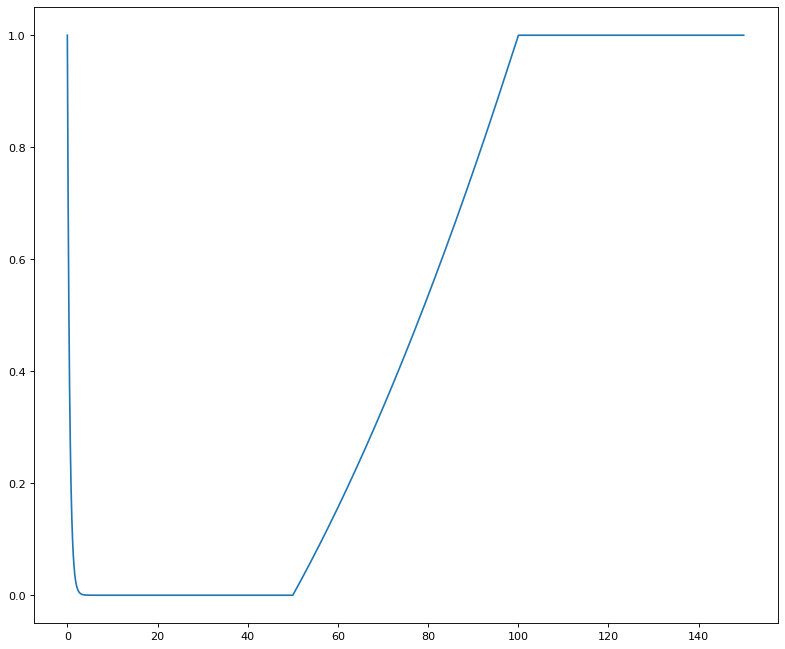

In [47]:
from matplotlib.pyplot import figure

x = np.linspace(0,150,10000)
figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x,fun(x))
plt.show()

In [149]:
import pandas as pd

# Sample data
data = {
    'ID': [1, 2, 3],
    'Nr': [101, 102, 103],
    'Price1': [10.5, 15.2, 20.3],
    'Price2': [9.8, 14.6, 21.2],
    'Date1': ['2023-01-01', '2023-02-01', '2023-03-01'],
    'Date2': ['2023-01-15', '2023-02-14', '2023-03-15']
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Difference
df['Difference'] = df['Price1'] - df['Price2']

# Calculate Days difference between Date1 and Date2
df['Date1'] = pd.to_datetime(df['Date1'])
df['Date2'] = pd.to_datetime(df['Date2'])
df['Days'] = (df['Date2'] - df['Date1']).dt.days

# Rearrange columns
df = df[['ID', 'Nr', 'Price1', 'Price2', 'Difference', 'Date1', 'Date2', 'Days']]

# Create MultiIndex columns with Flag 1 and Flag 2
df.columns = pd.MultiIndex.from_tuples([('Flag 1', 'ID'), ('Flag 1', 'Nr'), ('Flag 1', 'Price1'), ('Flag 1', 'Price2'), ('Flag 1', 'Difference'), ('Flag 2', 'Date1'), ('Flag 2', 'Date2'), ('Flag 2', 'Days')])

styled_df = df.style.set_properties(**{
    'border': '2px solid gray',  # Sets border style and color
    'text-align': 'center',       # Aligns text in cells
    'width': '50px',             # Sets width for each cell
})

# Display styled DataFrame
styled_df